# Check data iterator with data augmentation

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

import matplotlib.pylab as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import sys
sys.path.append('../common')

In [4]:
from data_utils import type_1_ids, type_2_ids, type_3_ids, test_ids
# from training_utils import get_trainval_id_type_lists
# from test_utils import get_test_id_type_list
# from metrics import logloss_mc

In [5]:
# from training_utils import data_augmentation, data_iterator
# train_id_type_list, _ = get_trainval_id_type_lists()

# image_size = (224, 224)
# batch_size = 5
# train_iter = data_iterator(train_id_type_list, 
#                            batch_size=batch_size, 
#                            image_size=image_size, 
#                            data_augmentation_fn=lambda X, Y: data_augmentation(X, Y),
#                            verbose=1, 
#                            test_mode=False)

((5, 3, 224, 224), dtype('float32'), (5, 3))


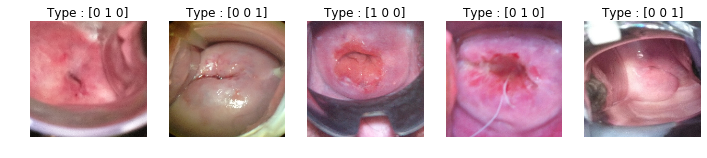

In [53]:
# for X, Y in train_iter:
#     print(X.shape, X.dtype, Y.shape)
#     n = 5
#     for counter in range(batch_size):
#         if counter % n == 0:
#             plt.figure(figsize=(12, 4))
#         plt.subplot(1, n, counter % n + 1)
#         plt.imshow(X[counter, :, :, :].transpose([1, 2, 0]))
#         plt.title("Type : {}".format(Y[counter,:]))
#         plt.axis('off')
    
#     break

In [ ]:
# train_id_type_list, _ = get_trainval_id_type_lists()

# image_size = (224, 224)
# batch_size = 5
# train_iter = data_iterator(train_id_type_list, 
#                            batch_size=batch_size, 
#                            image_size=image_size, 
#                            data_augmentation_fn=lambda X, Y: data_augmentation(X, Y),
#                            verbose=1, 
#                            test_mode=True)

('Image id/type:', '1011', 'Type_2', '| counter=', 0)
('Image id/type:', '1028', 'Type_3', '| counter=', 1)
('Image id/type:', '1027', 'Type_1', '| counter=', 2)
('Image id/type:', '1012', 'Type_2', '| counter=', 3)
('Image id/type:', '1029', 'Type_3', '| counter=', 4)
((5, 3, 224, 224), dtype('float32'), (5, 3))


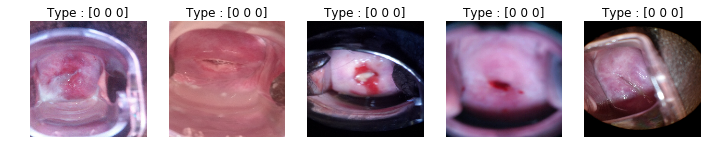

In [60]:
# for X, Y, _ in train_iter:
#     print(X.shape, X.dtype, Y.shape)
#     n = 5
#     for counter in range(batch_size):
#         if counter % n == 0:
#             plt.figure(figsize=(12, 4))
#         plt.subplot(1, n, counter % n + 1)
#         plt.imshow(X[counter, :, :, :].transpose([1, 2, 0]))
#         plt.title("Type : {}".format(Y[counter,:]))
#         plt.axis('off')
    
#     break

## KerasContrib - ImageMaskGenerator

In [5]:
import os
import numpy as np
np.random.seed(2017)

from data_utils import RESOURCES_PATH, GENERATED_DATA, get_annotations
from training_utils import get_trainval_id_type_lists2
sloth_annotations_filename = os.path.join(RESOURCES_PATH, 'cervix_os.json')
annotations = get_annotations(sloth_annotations_filename)

train_id_type_list, val_id_type_list = get_trainval_id_type_lists2(annotations=annotations, val_split=0.25)

print "Total : %s, Train : %s, Val : %s" % (len(annotations), len(train_id_type_list), len(val_id_type_list))

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5103)


Total : 639, Train : 479, Val : 160


In [6]:
from preprocessing.image.generators import ImageMaskGenerator
from training_utils import random_rgb_to_green

In [9]:
train_gen = ImageMaskGenerator(pipeline=('random_transform', random_rgb_to_green, 'standardize'),
                               featurewise_center=True, featurewise_std_normalization=True,
                               rotation_range=90., 
                               width_shift_range=0.15, height_shift_range=0.15,
                               shear_range=3.14/6.0,
                               zoom_range=0.25,
                               channel_shift_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=True)

# train_gen = ImageMaskGenerator(pipeline=(random_rgb_to_green,))

In [17]:
from xy_providers import cached_image_mask_provider as xy_provider
from xy_providers import DataCache

In [41]:
train_gen.fit(xy_provider(train_id_type_list,    
                          test_mode=True,
                          image_size=image_size,
                          verbose=1), 
              len(train_id_type_list), 
              augment=True, 
              save_to_dir=GENERATED_DATA,
              save_prefix='os_cervix',
              batch_size=4,
              verbose=1)

Initialize cache : 479
('Image id/type:', u'816', u'Type_2', '| counter=', 0)
-- Load from disk
  0/479 [..............................] - ETA: 0s('Image id/type:', u'538', u'Type_2', '| counter=', 1)
-- Load from disk
('Image id/type:', u'1036', u'Type_2', '| counter=', 2)
-- Load from disk
('Image id/type:', u'377', u'Type_2', '| counter=', 3)
-- Load from disk
('Image id/type:', u'771', u'Type_2', '| counter=', 4)
-- Load from disk
('Image id/type:', u'314', u'Type_2', '| counter=', 5)
-- Load from disk
('Image id/type:', u'610', u'Type_2', '| counter=', 6)
-- Load from disk
('Image id/type:', u'412', u'Type_2', '| counter=', 7)
-- Load from disk
  4/479 [..............................] - ETA: 183s('Image id/type:', u'595', u'Type_2', '| counter=', 8)
-- Load from disk
('Image id/type:', u'616', u'Type_2', '| counter=', 9)
-- Load from disk
('Image id/type:', u'139', u'Type_1', '| counter=', 10)
-- Load from disk
('Image id/type:', u'457', u'Type_2', '| counter=', 11)
-- Load from d

In [43]:
batch_size = 4
print("len(train_id_type_list)=", len(train_id_type_list))
flow = train_gen.flow(xy_provider(train_id_type_list, 
                                  cache=cache, 
                                  verbose=1), 
                      # Ensure that all batches have the same size
                      (len(train_id_type_list) // batch_size) * batch_size, 
                      batch_size=batch_size)

('len(train_id_type_list)=', 479)
Initialize cache : 479
('Image id/type:', u'816', u'Type_2', '| counter=', 0)
-- Load from disk


Check on 2 epochs 

In [44]:
loop_max_counter = (2050 // batch_size) * batch_size
for x, y in flow:
    print loop_max_counter, x.shape, y.shape   
    print x.mean(), x.std()
    assert x.shape[0] == batch_size
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break

('Image id/type:', u'538', u'Type_2', '| counter=', 1)
-- Load from disk
('Image id/type:', u'1036', u'Type_2', '| counter=', 2)
-- Load from disk
('Image id/type:', u'377', u'Type_2', '| counter=', 3)
-- Load from disk
2048 (4, 3, 224, 224) (4, 2, 224, 224)
0.232545 0.272918
('Image id/type:', u'771', u'Type_2', '| counter=', 4)
-- Load from disk
('Image id/type:', u'314', u'Type_2', '| counter=', 5)
-- Load from disk
('Image id/type:', u'610', u'Type_2', '| counter=', 6)
-- Load from disk
('Image id/type:', u'412', u'Type_2', '| counter=', 7)
-- Load from disk
2047 (4, 3, 224, 224) (4, 2, 224, 224)
0.336328 0.326946
('Image id/type:', u'595', u'Type_2', '| counter=', 8)
-- Load from disk
('Image id/type:', u'616', u'Type_2', '| counter=', 9)
-- Load from disk
('Image id/type:', u'139', u'Type_1', '| counter=', 10)
-- Load from disk
('Image id/type:', u'457', u'Type_2', '| counter=', 11)
-- Load from disk
2046 (4, 3, 224, 224) (4, 2, 224, 224)
0.373502 0.343064
('Image id/type:', u'35

KeyboardInterrupt: 

In [17]:
def normalize(in_img, q_min=0.5, q_max=99.5, return_mins_maxs=False):
    """
    Normalize image in [0.0, 1.0]
    mins is array of minima
    maxs is array of differences between maxima and minima
    """
    init_shape = in_img.shape
    if len(init_shape) == 2:
        in_img = np.expand_dims(in_img, axis=2)
    w, h, d = in_img.shape
    img = in_img.copy()
    img = np.reshape(img, [w * h, d]).astype(np.float64)
    mins = np.percentile(img, q_min, axis=0)
    maxs = np.percentile(img, q_max, axis=0) - mins
    maxs[(maxs < 0.0001) & (maxs > -0.0001)] = 0.0001
    img = (img - mins[None, :]) / maxs[None, :]
    img = img.clip(0.0, 1.0)
    img = np.reshape(img, [w, h, d])
    if init_shape != img.shape:
        img = img.reshape(init_shape)
    if return_mins_maxs:
        return img, mins, maxs
    return img

def scale_percentile(matrix, q_min=0.5, q_max=99.5):
    is_gray = False
    if len(matrix.shape) == 2:
        is_gray = True
        matrix = matrix.reshape(matrix.shape + (1,))
    matrix = (255*normalize(matrix, q_min, q_max)).astype(np.uint8)
    if is_gray:
        matrix = matrix.reshape(matrix.shape[:2])
    return matrix  

(4, 3, 224, 224) (4, 2, 224, 224)
0.286971 0.279376
(4, 3, 224, 224) (4, 2, 224, 224)
0.236758 0.280845


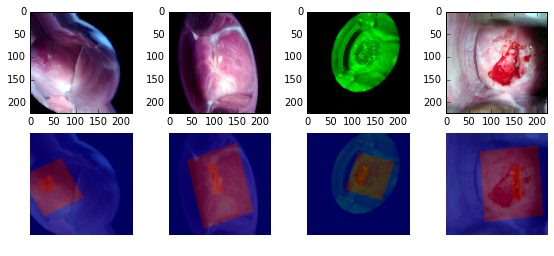

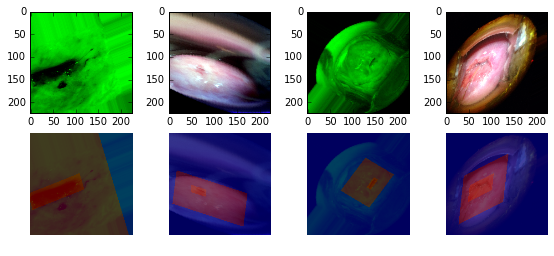

In [34]:
loop_max_counter = 2
for x, y in flow:
    print x.shape, y.shape   
    print x.mean(), x.std()
    n = 5
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(2, n, counter % n + 1)
        plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.subplot(2, n, n + counter % n + 1)
        plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.imshow(y[counter, 0, :, :], alpha=0.5)
        plt.imshow(y[counter, 1, :, :], alpha=0.5)    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

In [ ]:
def get_test_id_type_list2(annotations):
    
    trainval_filepaths = []
    return [(image_id, 'Test') for image_id in test_ids]


In [40]:
trainval_id_type_list = []
for annotation in annotations:
    image_name = annotation['filename']
    image_id = os.path.basename(image_name)[:-4]
    image_type = os.path.split(os.path.dirname(image_name))[1]
    trainval_id_type_list.append((image_id, image_type))

test_id_type_list = [(image_id, 'Test') for image_id in test_ids]
type_ids=(type_1_ids, type_2_ids, type_3_ids)
image_types = ["Type_1", "Type_2", "Type_3"]

for image_ids, image_type in zip(type_ids, image_types):    
    for image_id in image_ids:
        if (image_id, image_type) not in trainval_id_type_list:
            test_id_type_list.append((image_id, image_type))
            

[('277', 'Test'),
 ('68', 'Test'),
 ('115', 'Test'),
 ('450', 'Test'),
 ('356', 'Test'),
 ('406', 'Test'),
 ('199', 'Test'),
 ('88', 'Test'),
 ('251', 'Test'),
 ('123', 'Test'),
 ('223', 'Test'),
 ('92', 'Test'),
 ('335', 'Test'),
 ('224', 'Test'),
 ('261', 'Test'),
 ('415', 'Test'),
 ('369', 'Test'),
 ('47', 'Test'),
 ('511', 'Test'),
 ('151', 'Test'),
 ('408', 'Test'),
 ('484', 'Test'),
 ('288', 'Test'),
 ('496', 'Test'),
 ('121', 'Test'),
 ('49', 'Test'),
 ('338', 'Test'),
 ('382', 'Test'),
 ('39', 'Test'),
 ('375', 'Test'),
 ('183', 'Test'),
 ('502', 'Test'),
 ('376', 'Test'),
 ('330', 'Test'),
 ('116', 'Test'),
 ('424', 'Test'),
 ('347', 'Test'),
 ('349', 'Test'),
 ('208', 'Test'),
 ('170', 'Test'),
 ('143', 'Test'),
 ('463', 'Test'),
 ('259', 'Test'),
 ('100', 'Test'),
 ('119', 'Test'),
 ('162', 'Test'),
 ('7', 'Test'),
 ('500', 'Test'),
 ('214', 'Test'),
 ('319', 'Test'),
 ('14', 'Test'),
 ('293', 'Test'),
 ('129', 'Test'),
 ('398', 'Test'),
 ('187', 'Test'),
 ('176', 'Test'),
 

In [41]:
len(test_id_type_list)

1785

## KerasContrib - ImageDataGenerator

In [12]:
import os
import numpy as np
np.random.seed(2017)

from training_utils import get_trainval_id_type_lists
from data_utils import RESOURCES_PATH, GENERATED_DATA, get_annotations

from preprocessing.image.generators import ImageDataGenerator
from xy_providers import cached_image_label_provider as xy_provider, DataCache

In [7]:
train_id_type_list, val_id_type_list = get_trainval_id_type_lists()
cervix_train_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in train_id_type_list if id_type[0] != '1339']
cervix_val_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in val_id_type_list if id_type[0] != '1339']

Train dataset contains : 
('-', [175, 546, 315], ' images of corresponding types')
Validation dataset contains : 
('-', [75, 234, 135], ' images of corresponding types')


In [8]:
len(cervix_train_id_type_list), len(cervix_val_id_type_list)

(1635, 702)

In [9]:
from training_utils import random_rgb_to_green

In [10]:
train_gen = ImageDataGenerator(pipeline=('random_transform', random_rgb_to_green, 'standardize'),
                               featurewise_center=True,
                               featurewise_std_normalization=True,
                               rotation_range=90.,
                               width_shift_range=0.15, height_shift_range=0.15,
                               shear_range=3.14/6.0,
                               zoom_range=0.25,
                               channel_shift_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='constant')
val_gen = ImageDataGenerator(rotation_range=90.,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='constant')

In [13]:
train_gen.fit(xy_provider(train_id_type_list,    
                          test_mode=True,
                          verbose=1), 
              len(train_id_type_list), 
              augment=True, 
              save_to_dir=GENERATED_DATA,
              save_prefix='resnet_4_dense_seed=2017',
              batch_size=4,
              verbose=1)

Load existing file: /Users/vfomin/Documents/ML/Kaggle/Intel_MobileODT/input/generated/resnet_4_dense_seed=2017_stats.npz
No need to recompute statistics


In [14]:
cache = DataCache(1500)

In [15]:
batch_size = 4
print("len(train_id_type_list)=", len(train_id_type_list))
flow = train_gen.flow(xy_provider(train_id_type_list, 
                                  cache=cache, 
                                  verbose=1), 
                      # Ensure that all batches have the same size
                      (len(train_id_type_list) // batch_size) * batch_size, 
                      batch_size=batch_size)

('len(train_id_type_list)=', 1638)
('Image id/type:', '0', 'Type_1', '| counter=', 0)
-- Load from disk


In [35]:
# loop_max_counter = (512 // batch_size) * batch_size
# for x, y in flow:
#     print loop_max_counter, x.shape, y.shape   
#     print x.mean(), x.std()
#     assert x.shape[0] == batch_size
    
#     loop_max_counter -= 1
#     if loop_max_counter == 0:
#         break

('Image id/type:', '1420', 'Type_3_cervix', '| counter=', 400)
-- Load from disk
('Image id/type:', '421', 'Type_1_cervix', '| counter=', 401)
-- Load from disk
('Image id/type:', '1216', 'Type_2_cervix', '| counter=', 402)
-- Load from disk
('Image id/type:', '1423', 'Type_3_cervix', '| counter=', 403)
-- Load from disk
2048 (4, 3, 224, 224) (4,)
0.0261492 0.992398
('Image id/type:', '425', 'Type_1_cervix', '| counter=', 404)
-- Load from disk
('Image id/type:', '1217', 'Type_2_cervix', '| counter=', 405)
-- Load from disk
('Image id/type:', '1425', 'Type_3_cervix', '| counter=', 406)
-- Load from disk
('Image id/type:', '434', 'Type_1_cervix', '| counter=', 407)
-- Load from disk
2047 (4, 3, 224, 224) (4,)
-0.229877 0.95922
('Image id/type:', '1218', 'Type_2_cervix', '| counter=', 408)
-- Load from disk
('Image id/type:', '1429', 'Type_3_cervix', '| counter=', 409)
-- Load from disk
('Image id/type:', '441', 'Type_1_cervix', '| counter=', 410)
-- Load from disk
('Image id/type:', '12

('Image id/type:', '1057', 'Type_2', '| counter=', 100)
-- Load from disk
('Image id/type:', '1095', 'Type_3', '| counter=', 101)
-- Load from disk
('Image id/type:', '1190', 'Type_1', '| counter=', 102)
-- Load from disk
('Image id/type:', '1058', 'Type_2', '| counter=', 103)
-- Load from disk
(4, 3, 224, 224) (4, 3)
0.365903 1.05201
('Image id/type:', '11', 'Type_3', '| counter=', 104)
-- Load from disk
('Image id/type:', '1194', 'Type_1', '| counter=', 105)
-- Load from disk
('Image id/type:', '1065', 'Type_2', '| counter=', 106)
-- Load from disk
('Image id/type:', '1101', 'Type_3', '| counter=', 107)
-- Load from disk
(4, 3, 224, 224) (4, 3)
0.31413 1.05142


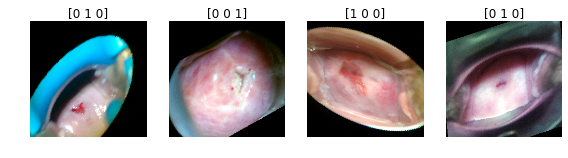

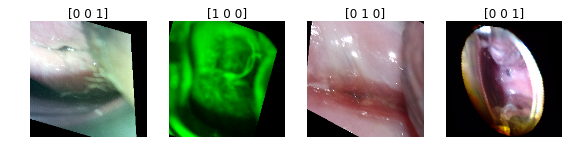

In [30]:
loop_max_counter = 2
for x, y in flow:
    print x.shape, y.shape   
    print x.mean(), x.std()
    n = 5
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.title("{}".format(y[counter]))    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

In [31]:
batch_size = 4
print("len(val_id_type_list)=", len(val_id_type_list))
flow = val_gen.flow(xy_provider(val_id_type_list, 
                                  cache=cache, 
                                  verbose=1), 
                      # Ensure that all batches have the same size
                      (len(val_id_type_list) // batch_size) * batch_size, 
                      batch_size=batch_size)

('len(val_id_type_list)=', 702)
('Image id/type:', '619', 'Type_1', '| counter=', 0)
-- Load from disk


('Image id/type:', '629', 'Type_3', '| counter=', 8)
-- Load from disk
('Image id/type:', '624', 'Type_1', '| counter=', 9)
-- Load from disk
('Image id/type:', '586', 'Type_2', '| counter=', 10)
-- Load from disk
('Image id/type:', '63', 'Type_3', '| counter=', 11)
-- Load from disk
(4, 3, 224, 224) (4, 3)
0.365767 0.312712
('Image id/type:', '641', 'Type_1', '| counter=', 12)
-- Load from disk
('Image id/type:', '588', 'Type_2', '| counter=', 13)
-- Load from disk
('Image id/type:', '630', 'Type_3', '| counter=', 14)
-- Load from disk
('Image id/type:', '643', 'Type_1', '| counter=', 15)
-- Load from disk
(4, 3, 224, 224) (4, 3)
0.379219 0.305923


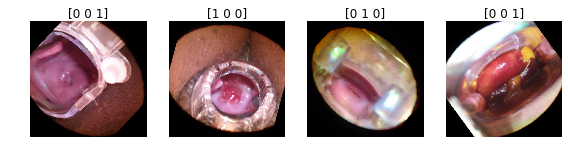

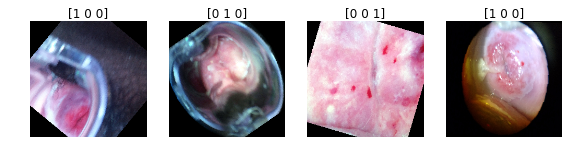

In [33]:
loop_max_counter = 2
for x, y in flow:
    print x.shape, y.shape   
    print x.mean(), x.std()
    n = 5
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.title("{}".format(y[counter]))    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    